In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '../icenumerics')

import icenumerics as ice

In [2]:
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

# From Cairo to Shakti

In this Script, I will build a function in order to define the parameters of the lattice as function of $\theta$, this way, by continuously modifing $\theta$ we can go from the Cairo lattice ($\theta$ = 30 degrees) to the Shakti lattice ($\theta$ = 0 degrees).

# Computing lattice parameters to preserve the interparticle distance

Plaquette            |  Zoom in 3 oordination vertex
:-------------------------:|:-------------------------:
![CairoLattice](Parameters.jpeg)  |  ![CairoLattice](Parameters0.jpeg)

In [3]:
import pandas as pd

Defining the variables of the pictures above as a function of $\theta$ and $\alpha$

In [4]:
def h(row):
    if row['theta'] == 0:
        value = 2*row['s_l3']
    else:
        value = 2*row['s_l3']*np.cos(row['theta'])
    return value

Introducing the $\theta$ and $\alpha$ values, the constants $d$, $trap$ $sep$ $l$ and $s_{l4}$ and generating the dataframe

In [5]:
d = 13 # Interparticle distance
trap_sep_l = 10 # trap_sep parameter of the edge connecting 3 coordination and 4 coordination vertices
s_l4 = d*np.sqrt(2)/2

In [6]:
theta = list(np.linspace(30*np.pi/180, 0, num=15, endpoint=True, retstep=False, dtype=None, axis=0))

In [7]:
data = {'theta': theta}

df = pd.DataFrame(data=data)

In [8]:
df['alpha'] = (np.pi/2-df['theta'])/2
df['s_l3'] = d*((np.sin(np.pi/2-df['theta']-df['alpha']))/(np.sin(np.pi/2+df['theta'])))
df['s_a'] = d*((np.sin(df['alpha']))/(np.sin(np.pi/2+df['theta'])))
df['l'] = s_l4 + trap_sep_l + df['s_l3']
df['a'] = 2*df['l']*(np.cos(df['theta'])-np.sin(df['theta']))
df['trap_sep_a'] = (df['a'] - 2*df['s_a'])
df['plaquette_cte'] = 2*df['l']*np.cos(df['theta'])
df['h'] = df.apply (lambda row: h(row) , axis=1)

In [11]:
10*np.pi/180

0.17453292519943295

In [15]:
0.187000*180/np.pi

10.714310768946394

In [17]:
13/(10/27.146)

35.2898

In [10]:
df

,theta,alpha,s_l3,s_a,l,a,trap_sep_a,plaquette_cte,h
0,0.523599,0.523599,7.505553,7.505553,26.697942,19.544250,4.533143,46.242191,13.000000
1,0.486199,0.542299,7.588808,7.588808,26.781196,22.327310,7.149695,47.355335,13.418763
2,0.448799,0.560999,7.676644,7.676644,26.869032,25.100250,9.746963,48.416322,13.832834
3,0.411399,0.579699,7.769286,7.769286,26.961674,27.860588,12.322017,49.424105,14.242068
4,0.373999,0.598399,7.866975,7.866975,27.059363,30.605911,14.871960,50.377702,14.646322
5,0.336599,0.617099,7.969975,7.969975,27.162363,33.333884,17.393934,51.276204,15.045454
6,0.299199,0.635799,8.078571,8.078571,27.270959,36.042261,19.885120,52.118773,15.439325
7,0.261799,0.654498,8.193071,8.193071,27.385459,38.728887,22.342746,52.904644,15.827797
8,0.224399,0.673198,8.313812,8.313812,27.506200,41.391714,24.764090,53.633125,16.210735
9,0.187000,0.691898,8.441161,8.441161,27.633549,44.028803,27.146481,54.303598,16.588004


In [17]:
df.to_csv('LatticesParameters.dat', sep='\t')

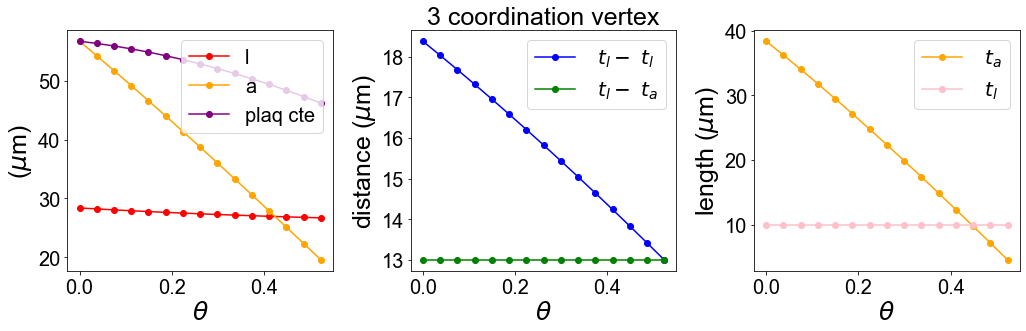

In [10]:
f, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
f.tight_layout(pad=5.0)

ax1.plot(df.theta, df.l,'o-', label ='l', color ='red')
ax1.plot(df.theta, df.a,'o-', label ='a', color = 'orange')
ax1.plot(df.theta, df.plaquette_cte,'o-', label ='plaq cte', color = 'purple')
ax1.legend(loc = 'upper right',fontsize = 20, title_fontsize = 20,ncol = 1,markerscale = 1)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.set_xlabel(r'$ \theta$', size = 25)
ax1.set_ylabel(r'($ \mu$m)', size = 25)

ax3.plot(df.theta, df.trap_sep_a,'o-', label =r'$ \ t_{a}$', color ='orange')
ax3.plot(df.theta, [10,10,10,10,10,10,10,10,10,10,10,10,10,10,10],'o-', label =r'$ \ t_{l}$', color = 'pink')
ax3.legend(loc = 'upper right',fontsize = 20, title_fontsize = 20,ncol = 1,markerscale = 1)
ax3.tick_params(axis='y', labelsize=20)
ax3.tick_params(axis='x', labelsize=20)
ax3.set_xlabel(r'$ \theta$', size = 25)
ax3.set_ylabel(r'length ($ \mu$m)', size = 25)

ax2.set_title('3 coordination vertex', size = 25)
ax2.plot(df.theta, df.h, 'o-', label =r'$ \ t_{l}- \ t_{l}$', color = 'blue')
ax2.plot(df.theta, [13,13,13,13,13,13,13,13,13,13,13,13,13,13,13], 'o-',label = r'$ \ t_{l}- \ t_{a}$', color = 'green')
ax2.set_ylabel(r'distance ($ \mu$m)', size = 25)
ax2.legend()
ax2.set_xlabel(r'$ \theta$', size = 25)
ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.legend(loc = 'upper right',fontsize = 20, title_fontsize = 20,ncol = 1,markerscale = 1)
plt.savefig('lattices_parameters')

# Let's build our lattice whit the obtained values

In [11]:
def From_Cairo_to_Shakti(theta, trap_sep_l, s_l3, s_l4, a, plaquette_cte):
    
    ureg = ice.ureg

    centers = [[0,0,0], # First plaquette 
                [-(s_l3+trap_sep_l/2)*np.cos(theta),a/2+(s_l3+trap_sep_l/2)*np.sin(theta),0],
                [+(s_l3+trap_sep_l/2)*np.cos(theta),a/2+(s_l3+trap_sep_l/2)*np.sin(theta),0],
                [-(s_l3+trap_sep_l/2)*np.cos(theta),-a/2-(s_l3+trap_sep_l/2)*np.sin(theta),0],
                [+(s_l3+trap_sep_l/2)*np.cos(theta),-a/2-(s_l3+trap_sep_l/2)*np.sin(theta),0],
                
                [plaquette_cte,0,0],# Second plaquette
                [plaquette_cte/2+(s_l4+trap_sep_l/2)*np.sin(theta),(s_l3+trap_sep_l/2)*np.cos(theta),0],
                [plaquette_cte+a/2+(s_l3+trap_sep_l/2)*np.sin(theta),(s_l3+trap_sep_l/2)*np.cos(theta),0],
                [plaquette_cte/2+(s_l4+trap_sep_l/2)*np.sin(theta),-(s_l3+trap_sep_l/2)*np.cos(theta),0],
                [plaquette_cte+a/2+(s_l3+trap_sep_l/2)*np.sin(theta),-(s_l3+trap_sep_l/2)*np.cos(theta),0],
                
                [0,-plaquette_cte,0],# Third plaquette
                [-a/2-(s_l3+trap_sep_l/2)*np.sin(theta),-plaquette_cte/2-(s_l4+trap_sep_l/2)*np.cos(theta),0],
                [+a/2+(s_l3+trap_sep_l/2)*np.sin(theta),-plaquette_cte/2-(s_l4+trap_sep_l/2)*np.cos(theta),0],
                [-a/2-(s_l3+trap_sep_l/2)*np.sin(theta),-plaquette_cte-(s_l3+trap_sep_l/2)*np.cos(theta),0],
                [+a/2+(s_l3+trap_sep_l/2)*np.sin(theta),-plaquette_cte-(s_l3+trap_sep_l/2)*np.cos(theta),0],
                
                [plaquette_cte,-plaquette_cte,0],# Fourth plaquette
                [plaquette_cte/2+(s_l4+trap_sep_l/2)*np.cos(theta),-plaquette_cte/2-(s_l4+trap_sep_l/2)*np.sin(theta),0],
                [plaquette_cte+(s_l3+trap_sep_l/2)*np.cos(theta),-plaquette_cte/2-(s_l4+trap_sep_l/2)*np.sin(theta),0],
                [plaquette_cte/2+(s_l4+trap_sep_l/2)*np.cos(theta),-plaquette_cte-a/2-(s_l3+trap_sep_l/2)*np.sin(theta),0],
                [plaquette_cte+(s_l3+trap_sep_l/2)*np.cos(theta),-plaquette_cte-a/2-(s_l3+trap_sep_l/2)*np.sin(theta),0]
              ]*ureg.um
   
    directions = [[0,2*trap_sep_l,0],# First plaquette
                  [-trap_sep_l*np.cos(theta),trap_sep_l*np.sin(theta),a*0],
                  [trap_sep_l*np.cos(theta),trap_sep_l*np.sin(theta),a*0],
                  [trap_sep_l*np.cos(theta),trap_sep_l*np.sin(theta),a*0],
                  [trap_sep_l*np.cos(theta),-trap_sep_l*np.sin(theta),a*0],
                  
                  [2*trap_sep_l,0,0],# Second plaquette 
                  [-trap_sep_l*np.sin(theta),trap_sep_l*np.cos(theta),0],
                  [trap_sep_l*np.sin(theta),trap_sep_l*np.cos(theta),0],
                  [trap_sep_l*np.sin(theta),trap_sep_l*np.cos(theta),0],
                  [-trap_sep_l*np.sin(theta),trap_sep_l*np.cos(theta),0],
                  
                  [2*trap_sep_l,0,0], #Third plaquette
                  [-trap_sep_l*np.sin(theta),trap_sep_l*np.cos(theta),0],
                  [trap_sep_l*np.sin(theta),trap_sep_l*np.cos(theta),0],
                  [trap_sep_l*np.sin(theta),trap_sep_l*np.cos(theta),0],
                  [-trap_sep_l*np.sin(theta),trap_sep_l*np.cos(theta),0],
                  
                  [0,2*trap_sep_l,0], # Fourth plaquette
                  [-trap_sep_l*np.cos(theta),trap_sep_l*np.sin(theta),a*0],
                  [trap_sep_l*np.cos(theta),trap_sep_l*np.sin(theta),a*0],
                  [trap_sep_l*np.cos(theta),trap_sep_l*np.sin(theta),a*0],
                  [trap_sep_l*np.cos(theta),-trap_sep_l*np.sin(theta),a*0]
                 ]*ureg.um
    
    
    return centers, directions

In [12]:
def From_Cairo_to_Shakti_vertices(theta, a, l, plaquette_cte):
    
    four_coord = [[-plaquette_cte/2,plaquette_cte/2],
                  [plaquette_cte/2,plaquette_cte/2],
                  [-plaquette_cte/2,-plaquette_cte/2],
                  [plaquette_cte/2,-plaquette_cte/2]]*ureg.um
    
    three_coord = [[0,a/2],
                  [0,-a/2],
                  [plaquette_cte/2+l*np.sin(theta),0],
                  [plaquette_cte/2+a/2,0],
                  [-a/2,-plaquette_cte],
                  [+a/2,-plaquette_cte],
                  [plaquette_cte,-plaquette_cte/2-l*np.sin(theta)],
                  [plaquette_cte,-plaquette_cte-a/2]]*ureg.um
   
    return four_coord, three_coord

In [28]:
i = 0

d = 13 # Interparticle distance

trap_sep_l = 10 # trap_sep parameter of the edge connecting 3 coordination and 4 coordination vertices
trap_sep_a = df.iloc[i]['trap_sep_a']

s_l4 = d*np.sqrt(2)/2
s_l3 = df.iloc[i]['s_l3']

theta = df.iloc[i]['theta']

a = df.iloc[i]['a']
plaquette_cte = df.iloc[i]['plaquette_cte']

In [29]:
centers, directions= From_Cairo_to_Shakti(theta, trap_sep_l, s_l3, s_l4, a, plaquette_cte)

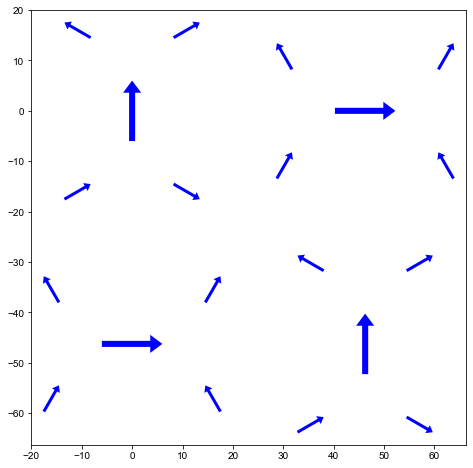

In [30]:
ureg = ice.ureg

sp = ice.spins(centers = centers, directions = directions)


f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

In [31]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap_long = ice.trap(trap_sep = trap_sep_l*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

trap_short = ice.trap(trap_sep = trap_sep_a*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

traps = []

In [32]:
for s in sp:
    
    if ( s.direction[0].magnitude == 2*trap_sep_l or s.direction[0].magnitude == -2*trap_sep_l or 
        s.direction[1].magnitude == 2*trap_sep_l or s.direction[1].magnitude == -2*trap_sep_l ):
        
        traps.append(trap_short)
        
    else:
        
        traps.append(trap_long)

In [33]:
col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)

col.pad_region(20*ureg.um) 

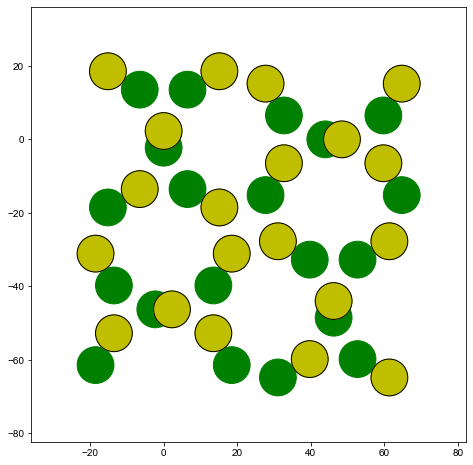

In [34]:
f, (ax1) = plt.subplots(1,1,figsize = (8,8))
col.display(ax1)

In [35]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-13.0"

In [36]:
world = ice.world(
    field = 0*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

In [37]:
total_time = 10*ureg.s
col.simulate(world,
             name = "From_Cairo_to_Shakti_TEST",
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = total_time,
             output = ["x","y","z","mux","muy","muz"])

scanning file


In [23]:
col.sim.field.fieldz = "(time<1000000000)*v_Bmag*time/%f+(time>=1000000000)*v_Bmag"%(total_time.to(ureg.us).magnitude)
col.run_simulation()

,x,y,coordination,dx,dy
charge,,,,,
-2,1,1,1,1,1
0,2,2,2,2,2
2,2,2,2,2,2


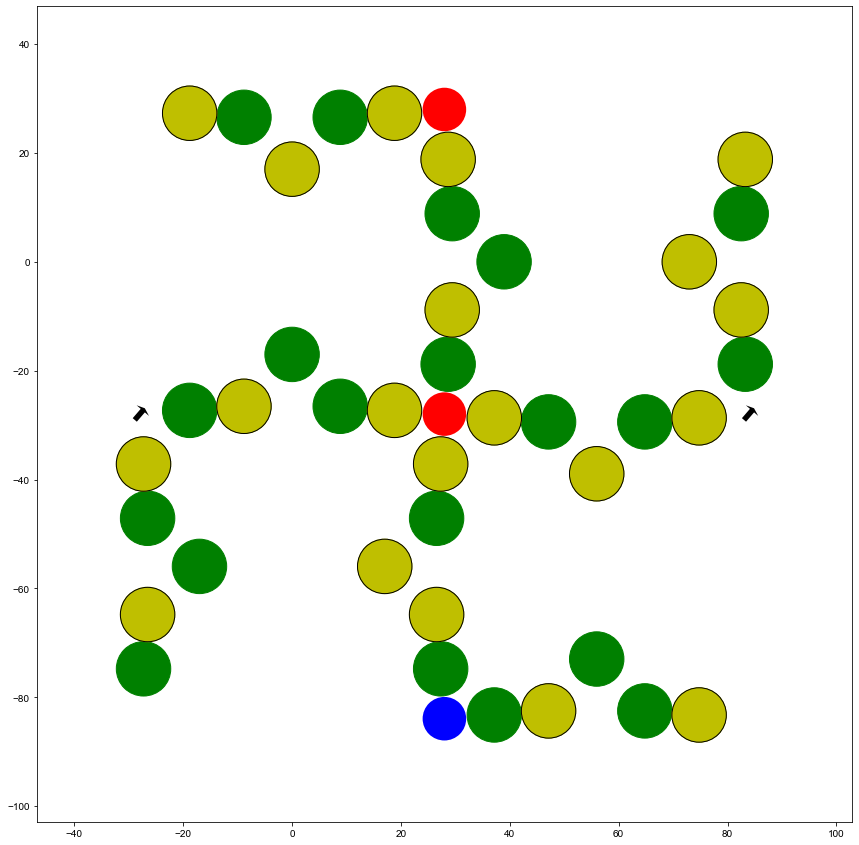

In [24]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(0)
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)
v.vertices.groupby('charge').count()

In [25]:
v.vertices

,x,y,coordination,charge,dx,dy
0,-27.980968,-27.980968,2,0,0.922474,1.071934
1,27.980968,27.980968,2,2,0.922474,1.071934
2,27.980968,-27.980968,4,2,0.149460,1.994408
3,27.980968,-83.942904,2,-2,0.922474,1.071934
4,83.942904,-27.980968,2,0,0.922474,1.071934


In [26]:
v.edges

,start,end
edge,,
2,-1,1
3,0,-1
4,-1,2
6,-1,1
8,2,-1
9,4,-1
11,-1,0
12,-1,2
14,3,-1


In [27]:
v.edge_directory

{0: array([ 3, 11]),
 1: array([2, 6]),
 2: array([ 4,  8, 12, 16]),
 3: array([14, 18]),
 4: array([ 9, 17])}